In [1]:
import shapefile
import pandas as pd
import numpy as np
import shapely
from shapely.geometry import Polygon
from shapely.geometry import Point
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Q: How does a shapefile work?
<br>A: Still a bit confused...</h3>
<h4>My main question is, how can I link the neighborhood names with the neighborhood points? Are the names and the points in a particular order? Haaalp.</h4>

In [3]:
sf_sf = shapefile.Reader('../downloads/sf_neighborhoods/geo_export_197f44fb-6cc0-472b-81f7-347deefb57df')
sf_sea = shapefile.Reader('../downloads/seattle_neighborhoods/Neighborhoods')

In [4]:
shapes_sf = sf_sf.shapes() # shp file contents
fields_sf = sf_sf.fields # headers
records_sf = sf_sf.records() # dbf file contents
shapes_sea = sf_sea.shapes()
fields_sea = sf_sea.fields
records_sea = sf_sea.records()

In [120]:
print records_sf[0]
print fields_sf
print len(shapes_sf)

['6e', 'District 6 - Central North', 'Alamo Square']
[('DeletionFlag', 'C', 1, 0), ['nid', 'C', 254, 0], ['sfar_distr', 'C', 254, 0], ['nbrhood', 'C', 254, 0]]
92


In [125]:
print len(records_sea)
print len(shapes_sea)

119
119


In [32]:
print fields_sf
print fields_sea

[('DeletionFlag', 'C', 1, 0), ['nid', 'C', 254, 0], ['sfar_distr', 'C', 254, 0], ['nbrhood', 'C', 254, 0]]
[('DeletionFlag', 'C', 1, 0), ['OBJECTID', 'N', 10, 0], ['AREA', 'N', 15, 3], ['PERIMETER', 'N', 15, 3], ['HOODS_', 'N', 11, 0], ['HOODS_ID', 'N', 11, 0], ['S_HOOD', 'C', 26, 0], ['L_HOOD', 'C', 26, 0], ['L_HOODID', 'N', 3, 0], ['SYMBOL', 'N', 3, 0], ['SYMBOL2', 'N', 3, 0], ['SHAPE_AREA', 'F', 19, 11], ['SHAPE_LEN', 'F', 19, 11]]


Neighborhood:  Alamo Square


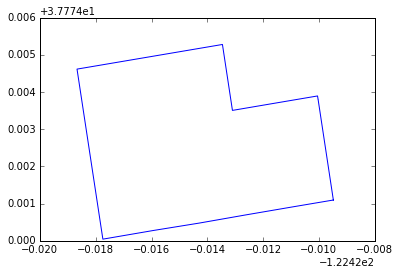

Neighborhood:  Anza Vista


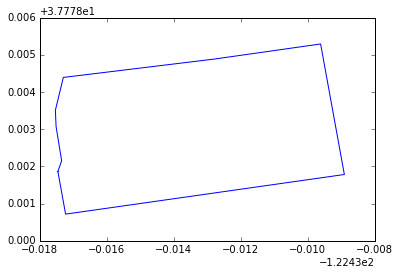

Neighborhood:  Balboa Terrace


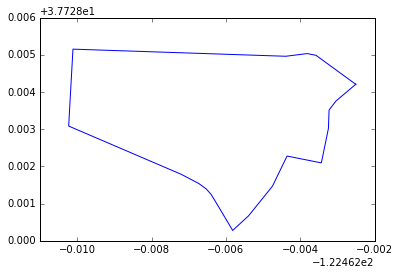

Neighborhood:  Bayview


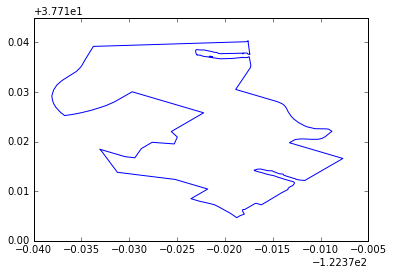

Neighborhood:  Bernal Heights


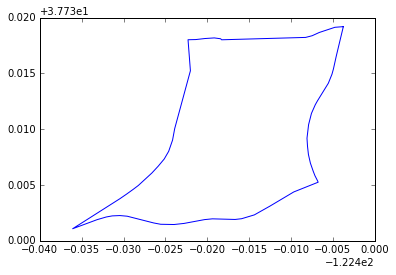

Neighborhood:  Buena Vista Park/Ashbury Heights


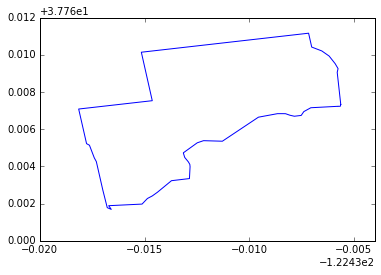

Neighborhood:  Central Richmond


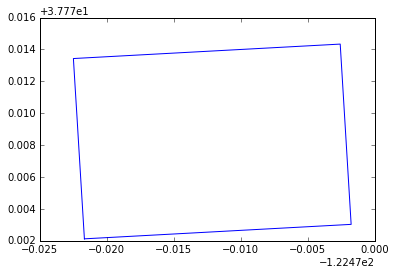

Neighborhood:  Central Sunset


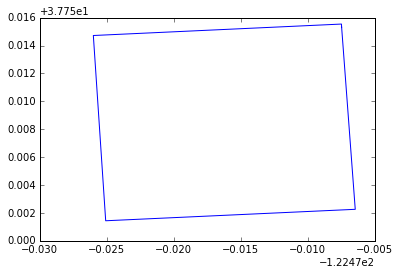

Neighborhood:  Clarendon Heights


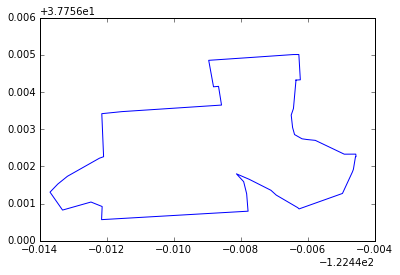

Neighborhood:  Corona Heights


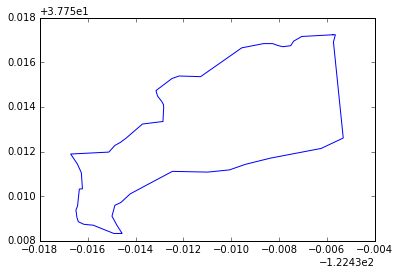

Neighborhood:  Cow Hollow


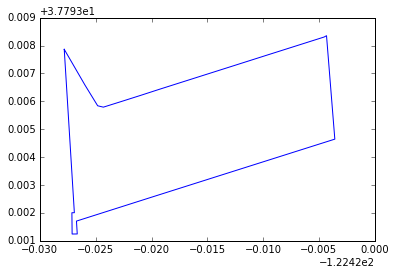

Neighborhood:  Crocker Amazon


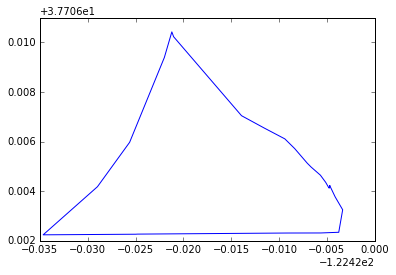

Neighborhood:  Diamond Heights


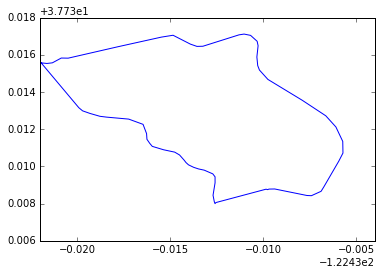

Neighborhood:  Downtown


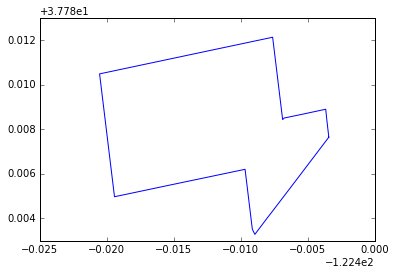

Neighborhood:  Duboce Triangle


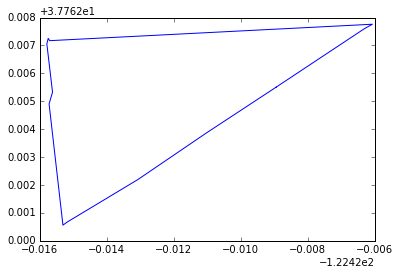

Neighborhood:  Eureka Valley / Dolores Heights


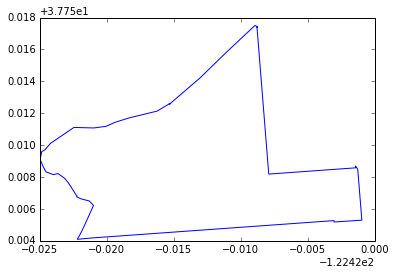

Neighborhood:  Excelsior


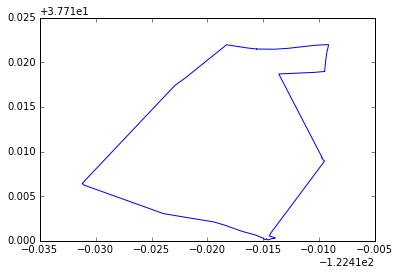

Neighborhood:  Financial District/Barbary Coast


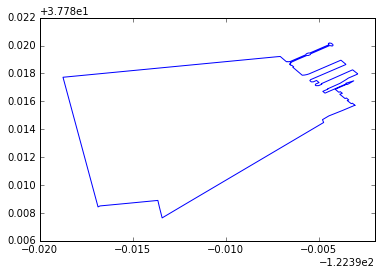

Neighborhood:  Yerba Buena


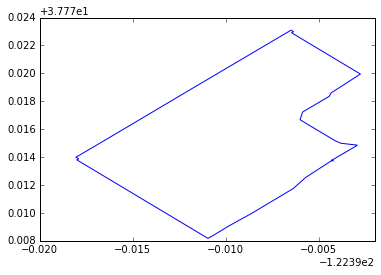

Neighborhood:  Forest Hill


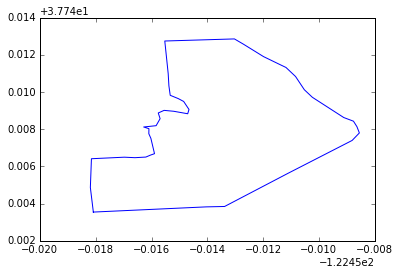

Neighborhood:  Forest Hills Extension


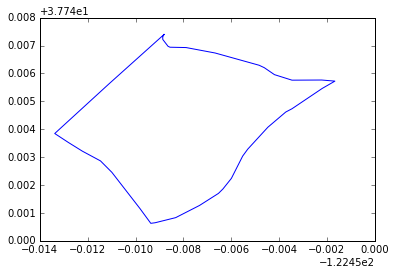

Neighborhood:  Forest Knolls


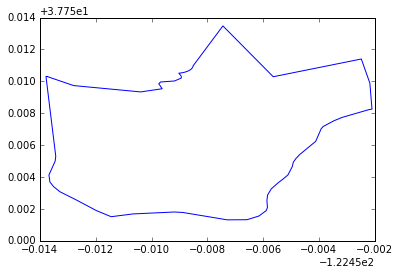

Neighborhood:  Glen Park


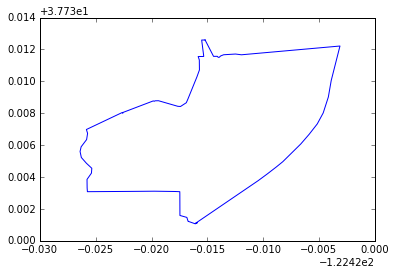

Neighborhood:  Golden Gate Heights


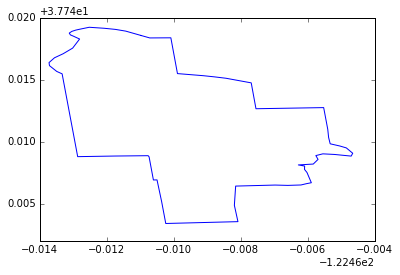

Neighborhood:  Golden Gate Park


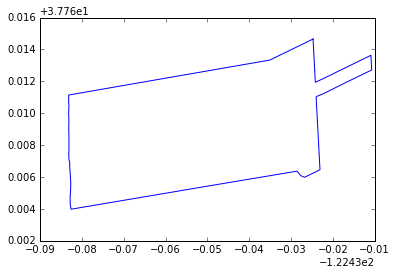

Neighborhood:  Haight Ashbury


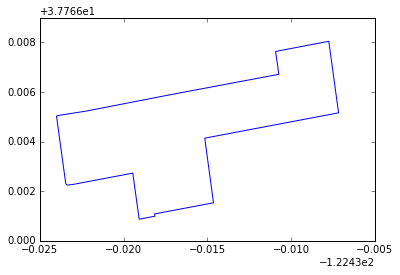

Neighborhood:  Hayes Valley


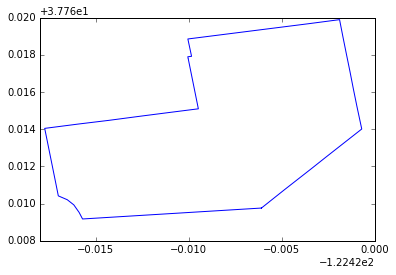

Neighborhood:  Hunters Point


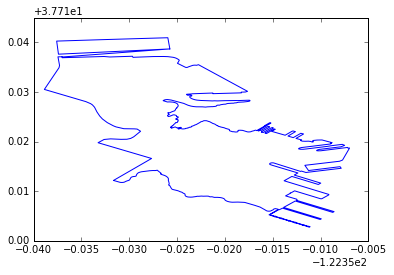

Neighborhood:  Ingleside


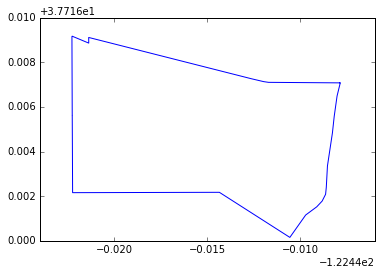

Neighborhood:  Ingleside Heights


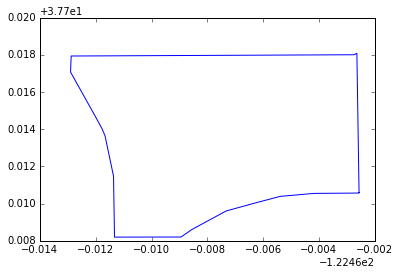

Neighborhood:  Ingleside Terrace


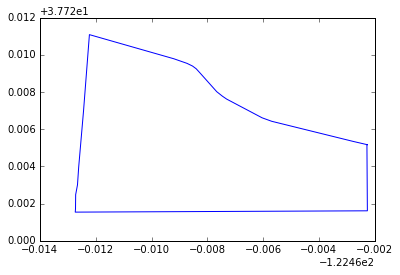

Neighborhood:  Inner Mission


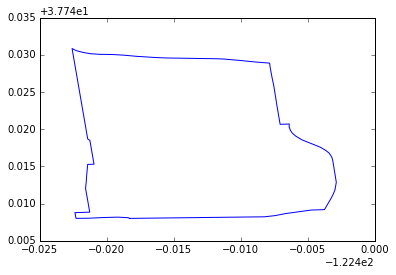

Neighborhood:  Inner Parkside


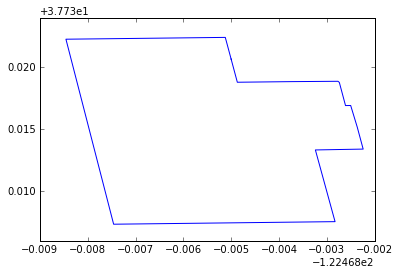

Neighborhood:  Inner Richmond


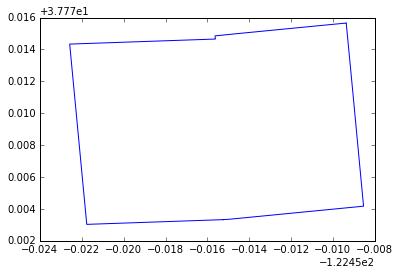

Neighborhood:  Inner Sunset


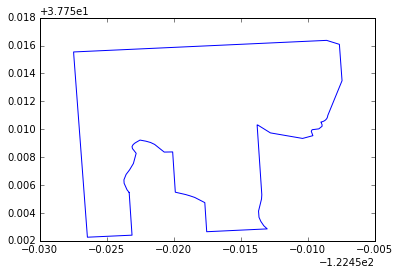

Neighborhood:  Jordan Park / Laurel Heights


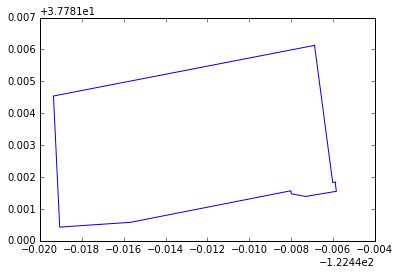

Neighborhood:  Lake Street


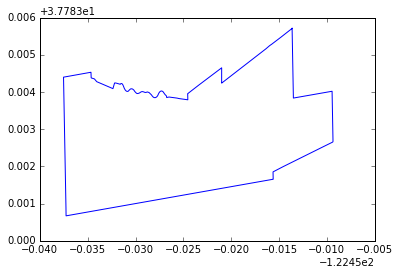

Neighborhood:  Lake Shore


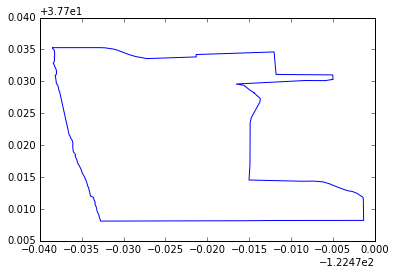

Neighborhood:  Lakeside


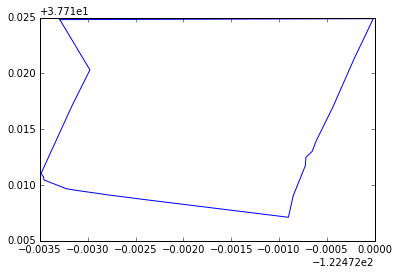

Neighborhood:  Lone Mountain


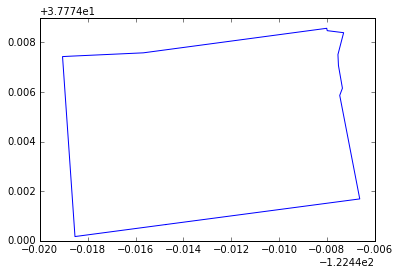

Neighborhood:  Lower Pacific Heights


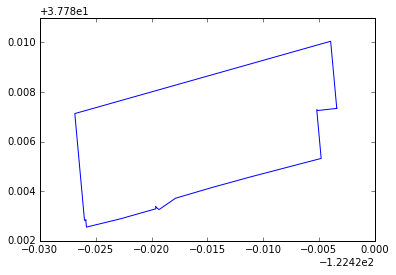

Neighborhood:  Marina


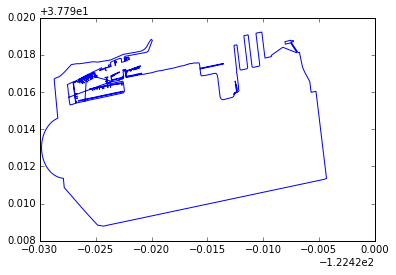

Neighborhood:  Merced Heights


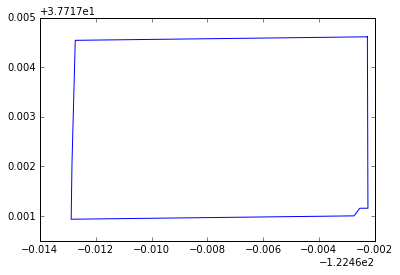

Neighborhood:  Merced Manor


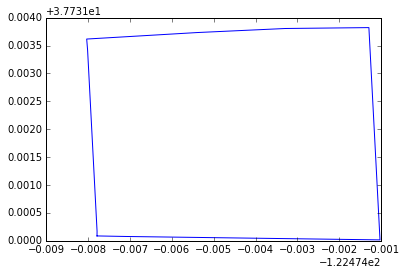

Neighborhood:  Midtown Terrace


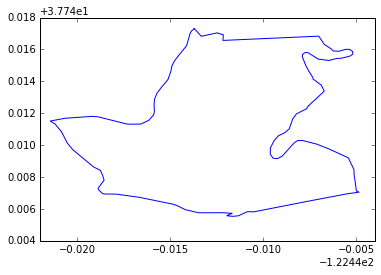

Neighborhood:  Miraloma Park


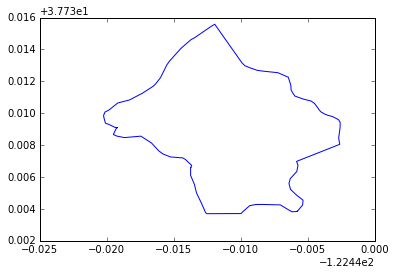

Neighborhood:  Mission Bay


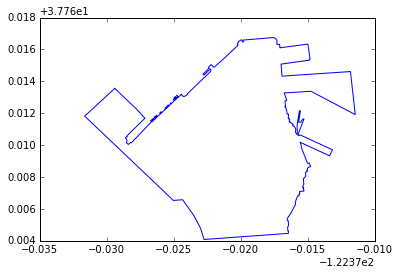

Neighborhood:  Mission Dolores


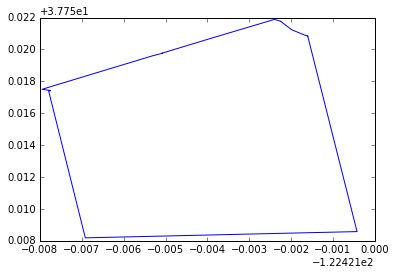

Neighborhood:  Mission Terrace


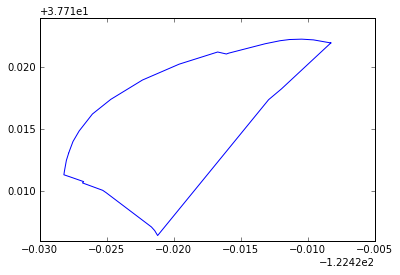

Neighborhood:  Monterey Heights


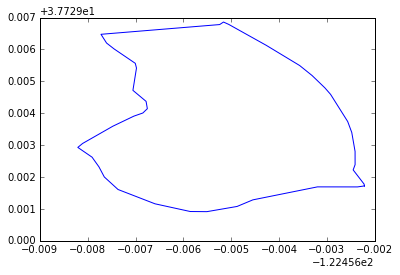

Neighborhood:  Mount Davidson Manor


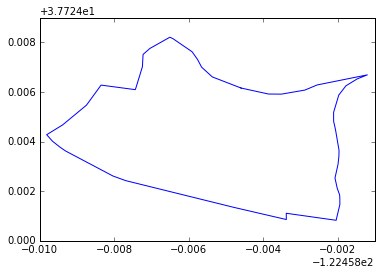

Neighborhood:  Noe Valley


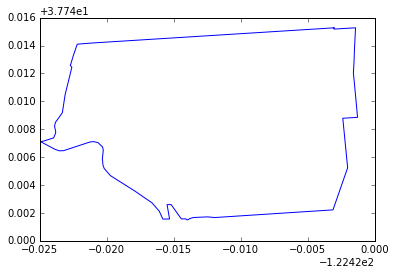

Neighborhood:  North Beach


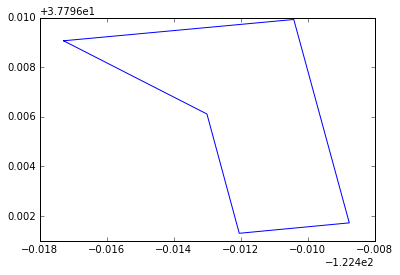

Neighborhood:  North Panhandle


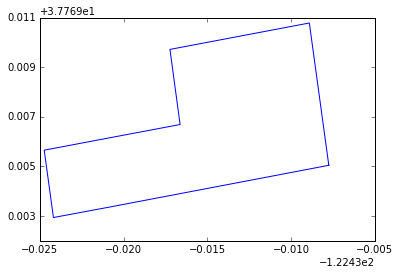

Neighborhood:  North Waterfront


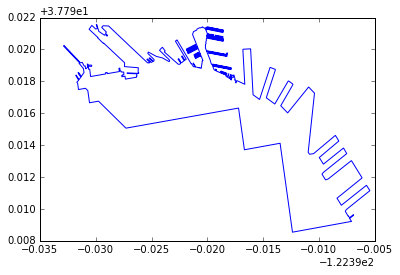

Neighborhood:  Oceanview


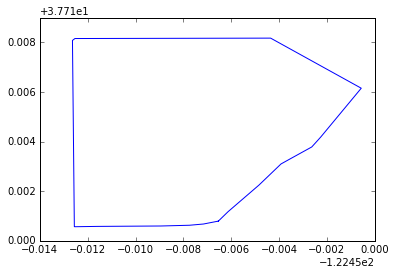

Neighborhood:  Outer Mission


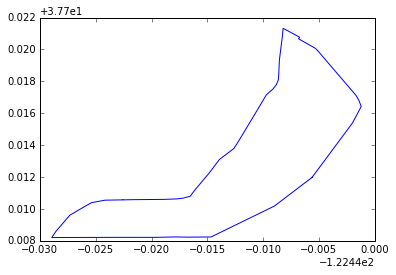

Neighborhood:  Outer Parkside


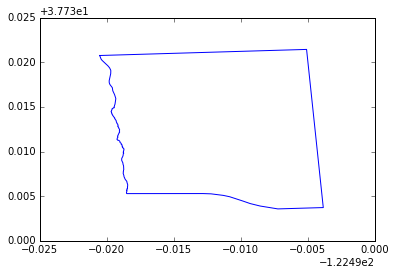

Neighborhood:  Outer Richmond


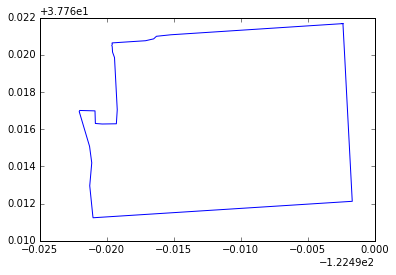

Neighborhood:  Outer Sunset


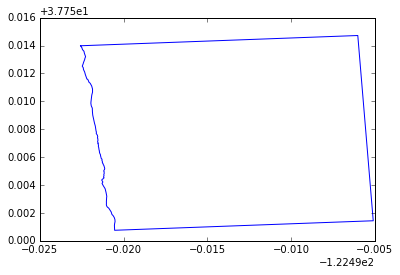

Neighborhood:  Pacific Heights


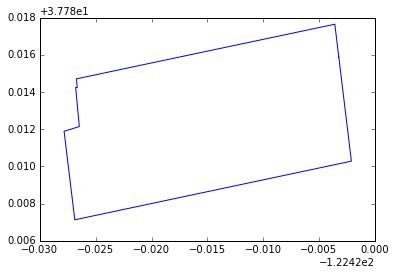

Neighborhood:  Parkside


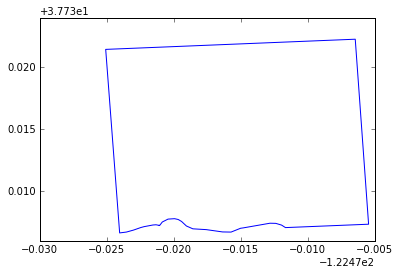

Neighborhood:  Cole Valley/Parnassus Heights


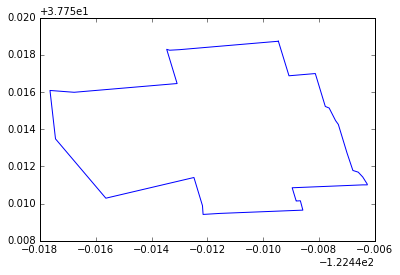

Neighborhood:  Pine Lake Park


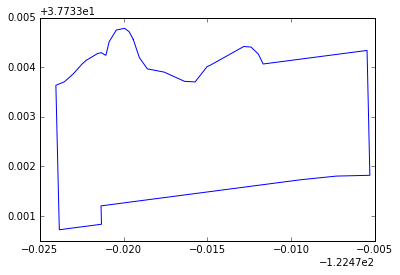

Neighborhood:  Portola


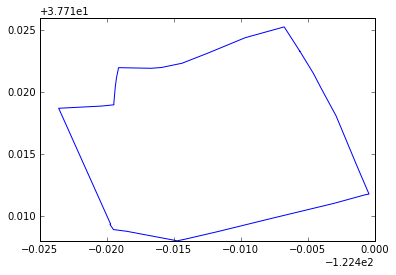

Neighborhood:  Potrero Hill


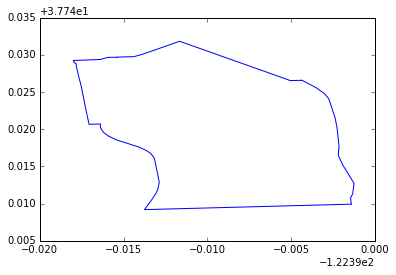

Neighborhood:  Presidio


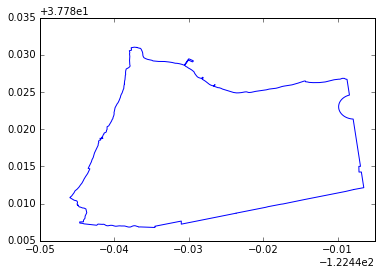

Neighborhood:  Presidio Heights


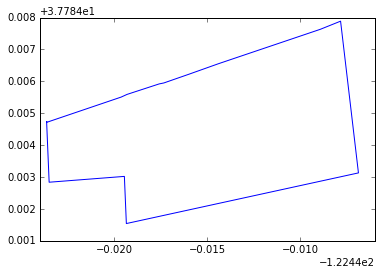

Neighborhood:  Russian Hill


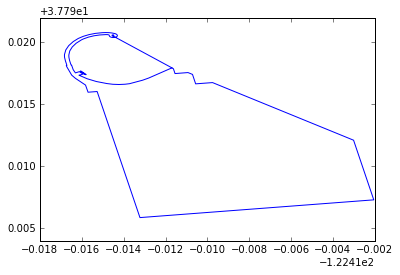

Neighborhood:  Saint Francis Wood


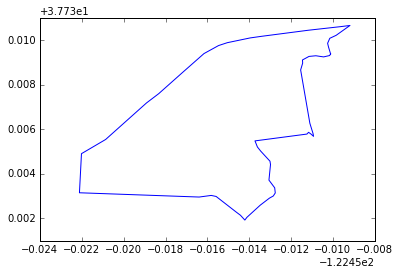

Neighborhood:  Sea Cliff


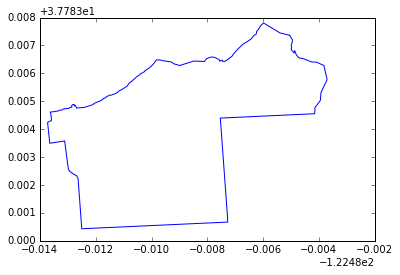

Neighborhood:  Silver Terrace


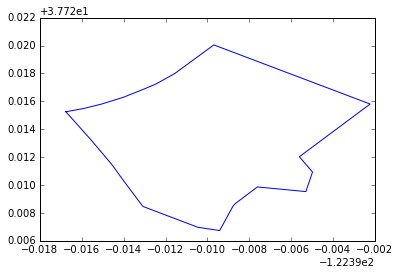

Neighborhood:  South Beach


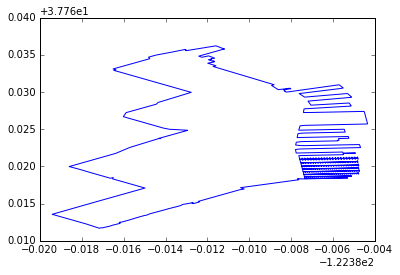

Neighborhood:  South of Market


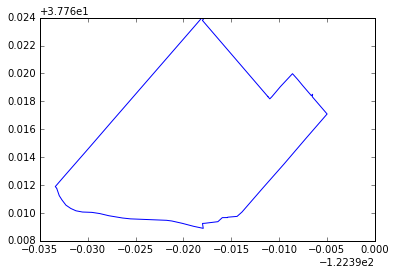

Neighborhood:  Stonestown


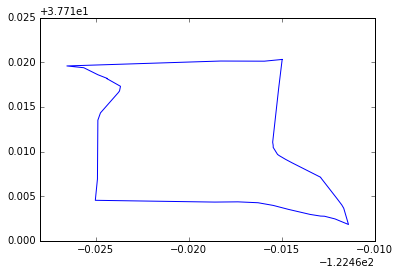

Neighborhood:  Sunnyside


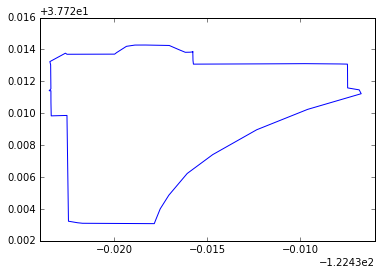

Neighborhood:  Telegraph Hill


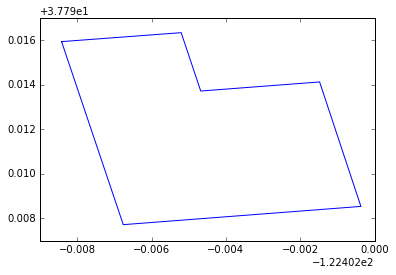

Neighborhood:  Twin Peaks


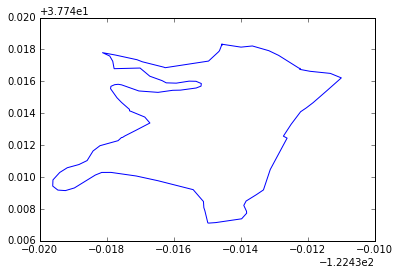

Neighborhood:  Van Ness/Civic Center


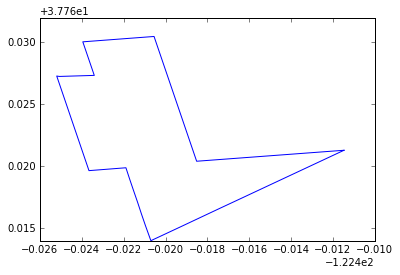

Neighborhood:  Visitacion Valley


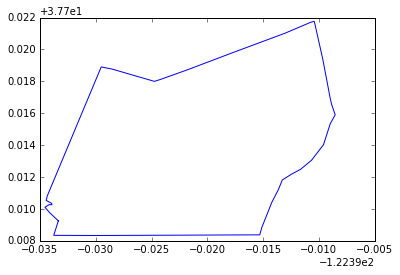

Neighborhood:  West Portal


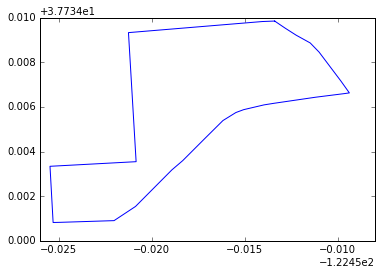

Neighborhood:  Western Addition


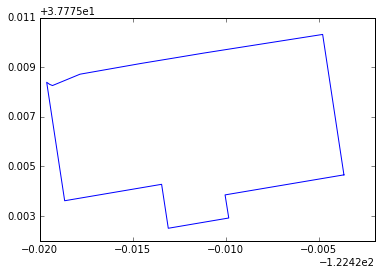

Neighborhood:  Westwood Highlands


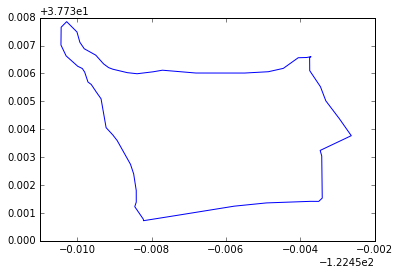

Neighborhood:  Westwood Park


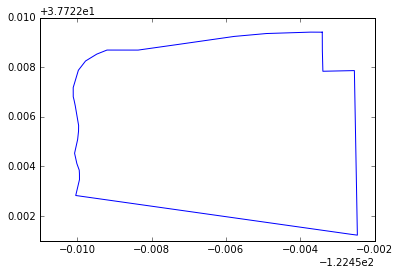

Neighborhood:  Lincoln Park


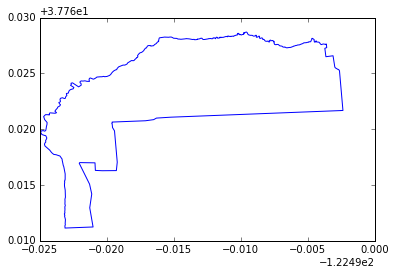

Neighborhood:  Sherwood Forest


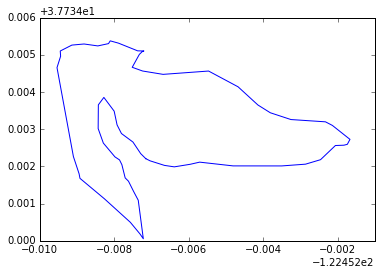

Neighborhood:  Tenderloin


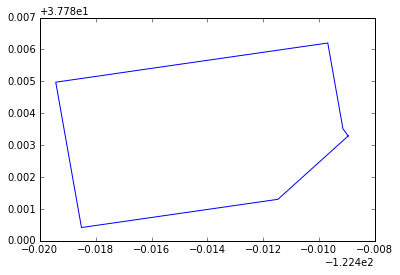

Neighborhood:  Central Waterfront/Dogpatch


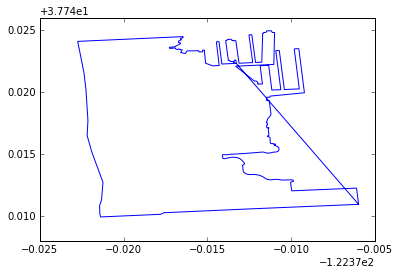

Neighborhood:  Candlestick Point


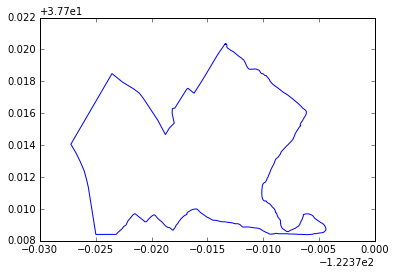

Neighborhood:  Bayview Heights


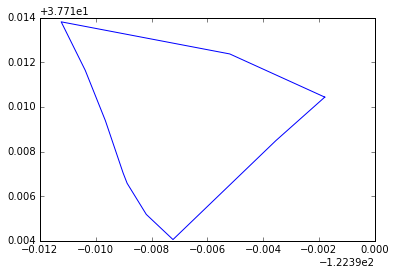

Neighborhood:  Little Hollywood


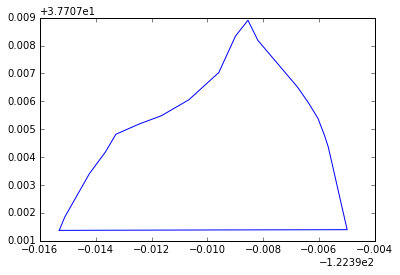

Neighborhood:  Nob Hill


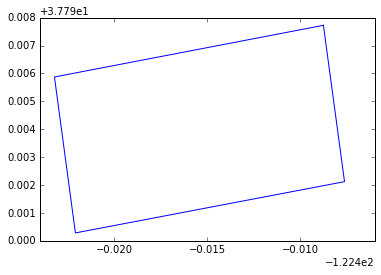

In [10]:
def plot_neighborhood(shape, record):
    print "Neighborhood: ", record[2]
    listx = []
    listy = []
    for xNew,yNew in shape.points:
        listx.append(xNew)
        listy.append(yNew)

    plt.plot(listx,listy)
    plt.show()

for shape, record in zip(shapes_sf, records_sf):
    plot_neighborhood(shape, record)

In [35]:
print records_sea

[6, 11371.064, 408.586, 8, 0, 'OOO', '                          ', 0, 0, 0, '0.00000000000e+000', '0.00000000000e+000']


In [104]:
for shape in shapes_sf:
    print shape.points

[[-122.42948394891741, 37.775096230704314], [-122.43101153840207, 37.77490283132814], [-122.43264862289246, 37.77469266061221], [-122.43429428444675, 37.77447581662921], [-122.43594032806337, 37.77427667844604], [-122.4376106240872, 37.774061646405066], [-122.43774490824637, 37.774044328330085], [-122.43867122231956, 37.77861526930866], [-122.43345910855257, 37.77927771863689], [-122.4331005636341, 37.77750542996215], [-122.43157464229915, 37.77769992520567], [-122.43005093549058, 37.77789364870233], [-122.43003059443478, 37.77780251540478], [-122.43003083164434, 37.77780248523876], [-122.42987991643541, 37.77705573292902], [-122.42948394891741, 37.775096230704314]]
[[-122.44746439135872, 37.77986335309237], [-122.44735192713006, 37.78015206066964], [-122.44751798255064, 37.781069511309816], [-122.44753905927386, 37.78151029413538], [-122.44730151303307, 37.78239164203754], [-122.44279310007408, 37.782885336383714], [-122.4396173770431, 37.78329099034325], [-122.43890760984469, 37.7797

In [56]:
count = 0
for record in records_sf:
    print record[2]
    count += 1
print "Number of neighborhoods in SF: ", count

Alamo Square
Anza Vista
Balboa Terrace
Bayview
Bernal Heights
Buena Vista Park/Ashbury Heights
Central Richmond
Central Sunset
Clarendon Heights
Corona Heights
Cow Hollow
Crocker Amazon
Diamond Heights
Downtown
Duboce Triangle
Eureka Valley / Dolores Heights
Excelsior
Financial District/Barbary Coast
Yerba Buena
Forest Hill
Forest Hills Extension
Forest Knolls
Glen Park
Golden Gate Heights
Golden Gate Park
Haight Ashbury
Hayes Valley
Hunters Point
Ingleside
Ingleside Heights
Ingleside Terrace
Inner Mission
Inner Parkside
Inner Richmond
Inner Sunset
Jordan Park / Laurel Heights
Lake Street
Lake Shore
Lakeside
Lone Mountain
Lower Pacific Heights
Marina
Merced Heights
Merced Manor
Midtown Terrace
Miraloma Park
Mission Bay
Mission Dolores
Mission Terrace
Monterey Heights
Mount Davidson Manor
Noe Valley
North Beach
North Panhandle
North Waterfront
Oceanview
Outer Mission
Outer Parkside
Outer Richmond
Outer Sunset
Pacific Heights
Parkside
Cole Valley/Parnassus Heights
Pine Lake Park
Portola


In [76]:
count = 0
for record in records_sea:
    if record[5] != 'OOO' and record[5][1] != ' ':
        print record[5]
        count += 1
print "Number of neighborhoods in SEA: ", count

Loyal Heights
Adams
Whittier Heights
West Woodland
Phinney Ridge
Wallingford
Fremont
Green Lake
View Ridge
Ravenna
Sand Point
Bryant
Windermere
Laurelhurst
Roosevelt
University District
East Queen Anne
West Queen Anne
Lower Queen Anne
North Queen Anne
Westlake
Eastlake
South Lake Union
Lawton Park
Briarcliff
Southeast Magnolia
Madrona
Harrison/Denny-Blaine
Minor
Leschi
Mann
Atlantic
Pike-Market
Belltown
International District
Central Business District
First Hill
Yesler Terrace
Pioneer Square
Interbay
Industrial District
Georgetown
South Park
Harbor Island
Seaview
Gatewood
Arbor Heights
Alki
North Admiral
Fairmount Park
Genesee
Fauntleroy
North Beacon Hill
Mid-Beacon Hill
South Beacon Hill
Holly Park
Brighton
Dunlap
Rainier Beach
Rainier View
Mount Baker
Columbia City
Highland Park
North Delridge
Riverview
High Point
South Delridge
Roxhill
Seward Park
Wedgwood
Portage Bay
Montlake
Madison Park
Broadway
Stevens
Victory Heights
Matthews Beach
Meadowbrook
Olympic Hills
Cedar Park
Industria

In [43]:
for shape in shapes_sf:
    print shape.points

[[-122.42948394891741, 37.775096230704314], [-122.43101153840207, 37.77490283132814], [-122.43264862289246, 37.77469266061221], [-122.43429428444675, 37.77447581662921], [-122.43594032806337, 37.77427667844604], [-122.4376106240872, 37.774061646405066], [-122.43774490824637, 37.774044328330085], [-122.43867122231956, 37.77861526930866], [-122.43345910855257, 37.77927771863689], [-122.4331005636341, 37.77750542996215], [-122.43157464229915, 37.77769992520567], [-122.43005093549058, 37.77789364870233], [-122.43003059443478, 37.77780251540478], [-122.43003083164434, 37.77780248523876], [-122.42987991643541, 37.77705573292902], [-122.42948394891741, 37.775096230704314]]
[[-122.44746439135872, 37.77986335309237], [-122.44735192713006, 37.78015206066964], [-122.44751798255064, 37.781069511309816], [-122.44753905927386, 37.78151029413538], [-122.44730151303307, 37.78239164203754], [-122.44279310007408, 37.782885336383714], [-122.4396173770431, 37.78329099034325], [-122.43890760984469, 37.7797

<h3>Q: Do the neighborhoods in Trulia match these neighborhood polygons?
<br>A: Let's check to see if the # of neighborhoods match!</h3>
<h4>San Francisco: 92 = 92, yes!
<br>Seattle: 91 Trulia neighborhoods, 92 polygon neighborhoods</h4>

In [45]:
import trulia.stats
import trulia.location
TRULIA_KEY = 'e937gfgv325b6bqtxqxjm6eu'

In [54]:
sf_hoods = trulia.location.LocationInfo(TRULIA_KEY).get_neighborhoods_in_city("San Francisco", "CA")
sea_hoods = trulia.location.LocationInfo(TRULIA_KEY).get_neighborhoods_in_city("Seattle", "WA")

In [53]:
count = 0
for hood in sf_hoods:
    print hood
    count += 1
print "Number of SF neighborhoods: ", count

OrderedDict([(u'id', u'1386'), (u'name', u'Alamo Square')])
OrderedDict([(u'id', u'1387'), (u'name', u'Anza Vista')])
OrderedDict([(u'id', u'1388'), (u'name', u'Ashbury Heights')])
OrderedDict([(u'id', u'1389'), (u'name', u'Balboa Terrace')])
OrderedDict([(u'id', u'1390'), (u'name', u'Bayview')])
OrderedDict([(u'id', u'1391'), (u'name', u'Bernal Heights')])
OrderedDict([(u'id', u'1392'), (u'name', u"Bernt's Knoll")])
OrderedDict([(u'id', u'1393'), (u'name', u'Buena Vista Park')])
OrderedDict([(u'id', u'1394'), (u'name', u'Castro')])
OrderedDict([(u'id', u'1395'), (u'name', u'Central Richmond')])
OrderedDict([(u'id', u'1396'), (u'name', u'Central Sunset')])
OrderedDict([(u'id', u'1397'), (u'name', u'Central Waterfront')])
OrderedDict([(u'id', u'1398'), (u'name', u'Chinatown')])
OrderedDict([(u'id', u'1399'), (u'name', u'Civic Center')])
OrderedDict([(u'id', u'1400'), (u'name', u'Cole Valley')])
OrderedDict([(u'id', u'1401'), (u'name', u'Cow Hollow')])
OrderedDict([(u'id', u'1402'), (u'n

In [55]:
count = 0
for hood in sea_hoods:
    print hood
    count += 1
print "Number of SEA neighborhoods: ", count

OrderedDict([(u'id', u'6803'), (u'name', u'Adams')])
OrderedDict([(u'id', u'6804'), (u'name', u'Alki')])
OrderedDict([(u'id', u'6805'), (u'name', u'Arbor Heights')])
OrderedDict([(u'id', u'6806'), (u'name', u'Atlantic')])
OrderedDict([(u'id', u'6807'), (u'name', u'Belltown')])
OrderedDict([(u'id', u'6808'), (u'name', u'Bitter Lake')])
OrderedDict([(u'id', u'6809'), (u'name', u'Briarcliff')])
OrderedDict([(u'id', u'6810'), (u'name', u'Brighton')])
OrderedDict([(u'id', u'6811'), (u'name', u'Broadview')])
OrderedDict([(u'id', u'6812'), (u'name', u'Broadway')])
OrderedDict([(u'id', u'6813'), (u'name', u'Bryant')])
OrderedDict([(u'id', u'6814'), (u'name', u'Cedar Heights')])
OrderedDict([(u'id', u'6815'), (u'name', u'Central Business District')])
OrderedDict([(u'id', u'6816'), (u'name', u'Columbia City')])
OrderedDict([(u'id', u'6817'), (u'name', u'Dunlap')])
OrderedDict([(u'id', u'6818'), (u'name', u'East Queen Anne')])
OrderedDict([(u'id', u'6819'), (u'name', u'Eastlake')])
OrderedDict([(

<h3>Q: Are Zillow's Neighborhood Boundaries better? Do they match with Trulia's data?
<br>A: Zillow's data has fewer neighborhoods in Seattle.</h3>
<h4>Zillow's Seattle boundaries seem to only have 78, not 92 neighborhoods. My guess is that Zillow does not break up 
bigger neighborhoods, like Ballard. My preference would be to work with finer neighborhood data, so it looks like Zillow's neighborhoods are out for now.</h4>

In [61]:
zillow_sf_wa = shapefile.Reader('../ZillowNeighborhoodsWA/ZillowNeighborhoods-WA')

In [62]:
zillow_shapes = zillow_sf_wa.shapes()
zillow_fields = zillow_sf_wa.fields
zillow_records = zillow_sf_wa.records()

In [71]:
seattle_hoods = []
for record in zillow_records:
    if record[2] == 'Seattle':
        seattle_hoods.append(record[3])
    
print seattle_hoods
print len(seattle_hoods)

['Westlake', 'Sand Point', 'South Park', 'Pinehurst', 'Brighton', 'Maple Leaf', 'Sunset Hill', 'Beacon Hill', 'Rainier Beach', 'Broadmoor', 'Madison Park', 'Whittier Heights', 'High Point', 'Interbay', 'View Ridge', 'Matthews Beach', 'Wedgwood', 'South Lake Union', 'Capitol Hill', 'First Hill', 'Arbor Heights', 'Northgate', 'Lower Queen Anne', 'Eastlake', 'Mount Baker', 'Fauntleroy', 'Windermere', 'Haller Lake', 'Meadowbrook', 'Downtown', 'Admiral', 'North College Park', 'Queen Anne', 'Atlantic', 'Loyal Heights', 'North Beach', 'Denny-Blaine', 'Madison Valley', 'Central District', 'International District', 'Industrial District', 'University District', 'Roosevelt', 'Pioneer Square', 'Blue Ridge', 'Ballard', 'Portage Bay', 'Roxhill', 'North Delridge', 'Highland Park', 'Fremont', 'Wallingford', 'Hawthorne Hills', 'Greenwood', 'Leschi', 'Columbia City', 'Riverview', 'Montlake', 'Green Lake', 'Olympic Hills', 'Ravenna', 'Laurelhurst', 'Crown Hill', 'Madrona', 'Broadview', 'Bitter Lake', 'Se

<h3>Q: Do the Trulia neighborhood names match with the polygon neighborhood names?
<br>A: Let's zip the names and compare.</h3>

In [92]:
# First, let's extract a list of neighborhood names from the Trulia SF neighborhoods object
# Big question: how do I index into OrderedDicts? sf_hoods[0].items()[1][1]

def extract_trulia_hoods(hoods):
    lst = []
    for hood in hoods:
        lst.append(hood.items()[1][1])
    return lst

trulia_sf_hoods = extract_trulia_hoods(sf_hoods)
trulia_sea_hoods = extract_trulia_hoods(sea_hoods)

print len(trulia_sf_hoods)
print len(trulia_sea_hoods)
    

92
92


In [95]:
# Next, let's grab the polygon neighborhood names into a clean list
# Explicitly convert to unicode so that they match the Trulia names well

polygon_sea_hoods = []
for record in records_sea:
    if record[5] != 'OOO' and record[5][1] != ' ':
        polygon_sea_hoods.append(unicode(record[5]))

print len(polygon_sea_hoods)

polygon_sf_hoods = []
for record in records_sf:
    polygon_sf_hoods.append(record[2])
    
print len(polygon_sf_hoods)

91
92


<h3>Observations:
<ul>
<li>Seattle polygon data does not seem to think that First Hill exists, while Trulia does</li>
</ul>
</h3>

In [106]:
# Sort all lists of strings alphabetically

trulia_sf_hoods = sorted(trulia_sf_hoods)
polygon_sf_hoods = sorted(polygon_sf_hoods)

trulia_sea_hoods = sorted(trulia_sea_hoods)
polygon_sea_hoods = sorted(polygon_sea_hoods)

print "SF NEIGHBORHOODS"
print "TRULIA NAME, POLYGON NAME"
for index in range(len(trulia_sf_hoods)):
    print trulia_sf_hoods[index] + ", " + polygon_sf_hoods[index]

SF NEIGHBORHOODS
TRULIA NAME, POLYGON NAME
Alamo Square, Alamo Square
Anza Vista, Anza Vista
Ashbury Heights, Balboa Terrace
Balboa Terrace, Bayview
Bayview, Bayview Heights
Bernal Heights, Bernal Heights
Bernt's Knoll, Buena Vista Park/Ashbury Heights
Buena Vista Park, Candlestick Point
Castro, Central Richmond
Central Richmond, Central Sunset
Central Sunset, Central Waterfront/Dogpatch
Central Waterfront, Clarendon Heights
Chinatown, Cole Valley/Parnassus Heights
Civic Center, Corona Heights
Cole Valley, Cow Hollow
Cow Hollow, Crocker Amazon
Crocker Amazon, Diamond Heights
Diamond Heights, Downtown
Downtown, Duboce Triangle
Duboce Triangle, Eureka Valley / Dolores Heights
Excelsior, Excelsior
Financial District, Financial District/Barbary Coast
Fisherman's Wharf, Forest Hill
Forest Hill, Forest Hills Extension
Forest Hill Extension, Forest Knolls
Forest Knolls, Glen Park
Fort Mason, Golden Gate Heights
Glen Park, Golden Gate Park
Golden Gate Heights, Haight Ashbury
Golden Gate Park, 

In [107]:
# Print SEA neighborhoods for manual inspection

print len(trulia_sea_hoods)
print len(polygon_sea_hoods)

92
91


In [108]:
print "SEA NEIGHBORHOODS"
print "TRULIA NAME, POLYGON NAME"
for index in range(len(polygon_sea_hoods)):
    print trulia_sea_hoods[index] + ", " + polygon_sea_hoods[index]
print trulia_sea_hoods[-1]

SEA NEIGHBORHOODS
TRULIA NAME, POLYGON NAME
Adams, Adams
Alki, Alki
Arbor Heights, Arbor Heights
Atlantic, Atlantic
Belltown, Belltown
Bitter Lake, Bitter Lake
Briarcliff, Briarcliff
Brighton, Brighton
Broadview, Broadview
Broadway, Broadway
Bryant, Bryant
Cedar Heights, Cedar Park
Central Business District, Central Business District
Columbia City, Columbia City
Crown Hill, Crown Hill
Dunlap, Dunlap
East Queen Anne, East Queen Anne
Eastlake, Eastlake
Fairmount Park, Fairmount Park
Fauntleroy, Fauntleroy
Fremont, First Hill
Gatewood, Fremont
Genesee, Gatewood
Georgetown, Genesee
Green Lake, Georgetown
Greenwood, Green Lake
Haller Lake, Greenwood
Harbor Island, Haller Lake
Harrison- Denny Blaine, Harbor Island
High Point, Harrison/Denny-Blaine
Highland Park, High Point
Holly Park, Highland Park
Industrial District, Holly Park
Industrial District East, Industrial District
Interbay, Industrial District
International District, Interbay
Junction, International District
Laurelhurst, Laurelhur